### Figure 2: Cell Turnover, Anisomycin Effects, and Placefield Stability Remapping

In [1]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
import pandas as pd

# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as er
from plotting import Fig, pretty_plot, FigMirror
import placefield_stability as pfs
import Placefields as pf
import discrimination as discr
import ca_traces as trc

Set up main figure for plotting

[8.5 6.5]


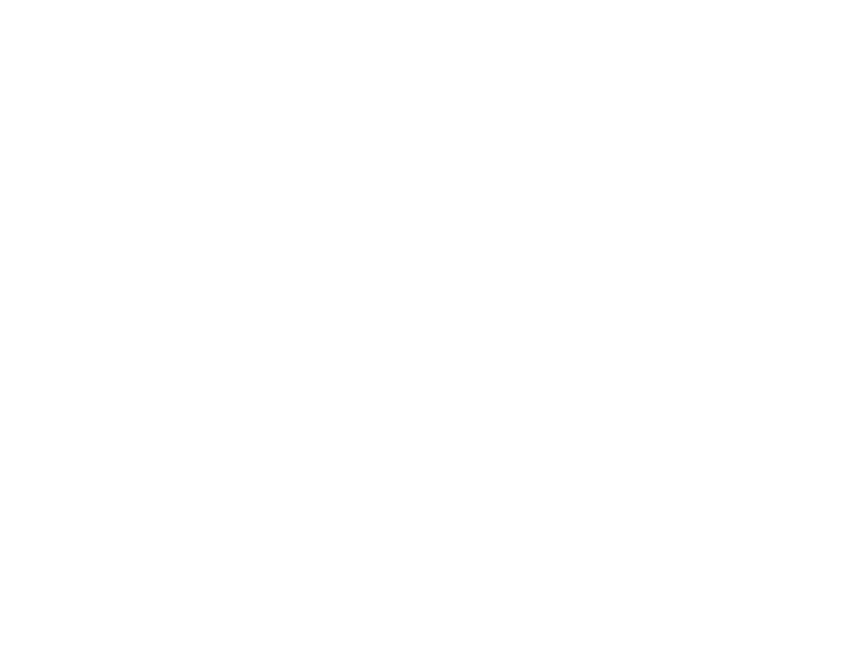

In [97]:
# Set up main figure plotting
%matplotlib ipympl
Fig2 = Fig(num=1, grid=(4, 4), size=(8.5, 6.5), fontsize=6)
print(Fig2.fig.get_size_inches())

[8.5 6.5]


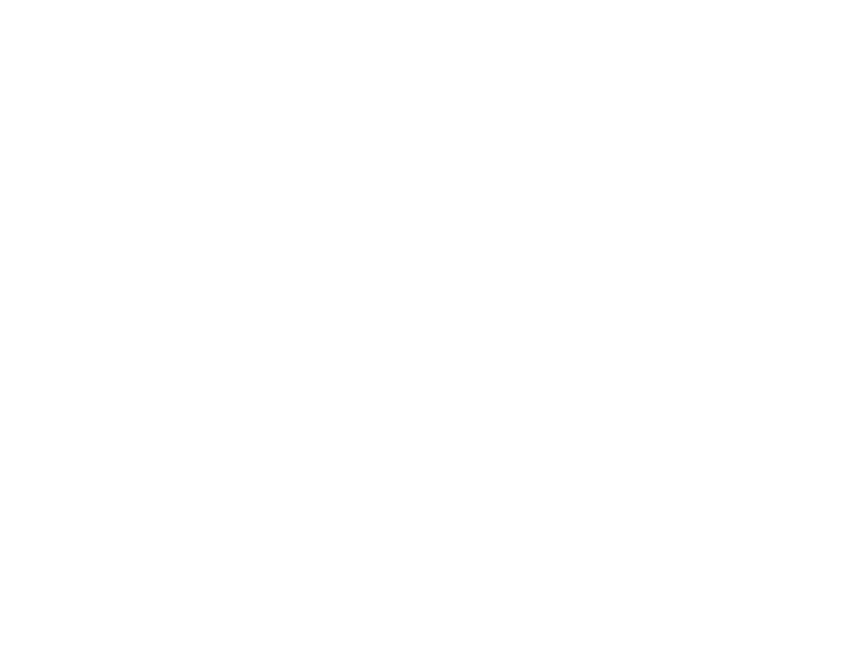

In [98]:
# Set up stats figure
Fig2stats = Fig(num="Figure 2 stats", grid=(4, 4), size=(8.5, 6.5), fontsize=6)
print(Fig2.fig.get_size_inches())
Fig2comb = FigMirror(Fig2, Fig2stats)

Plots #3/4: Cell turnover across days

In [88]:
# Test code for reshaping - want 1st index from 3rd dim folded into 2nd, e.g. combine shock v shock and open v open
a = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
a[:, :, 1] = a[:, :, 1]*10
print(a)
# So 1, 4, 7, and 20, 50, 80 are same arena, 3, 6, 9 are different
b = np.append(a, np.nan*np.ones_like(a[:, :, 2, None]), axis=2)
c = b.reshape((int(b.shape[0]*2), b.shape[1], int(b.shape[2]/2)), order='F')
print('3rd dim index = 0 after reshaping - should be 1, 4, 7, 20, 50, 80')
print(c[:, :, 0])
print('3rd dim index = 1 after reshaping - should be 3, 6, 9, and nan')
print(c[:, :, 1])
# Ok, so this works - things are grouped appropriately

[[[ 1 20  3]
  [ 4 50  6]
  [ 7 80  9]]

 [[ 1 20  3]
  [ 4 50  6]
  [ 7 80  9]]]
3rd dim index = 0 after reshaping - should be 1, 4, 7, 20, 50, 80
[[ 1.  7. 50.]
 [ 1.  7. 50.]
 [ 4. 20. 80.]
 [ 4. 20. 80.]]
3rd dim index = 1 after reshaping - should be 3, 6, 9, and nan
[[ 3.  9. nan]
 [ 3.  9. nan]
 [ 6. nan nan]
 [ 6. nan nan]]


In [99]:
plot_ind = False

axolap_ctrl = Fig2.subplot(441)
axolap_ani = Fig2.subplot(442)

for ax, mice, group_title in zip([axolap_ctrl, axolap_ani], [err.control_mice_good, err.ani_mice_good], 
                                 ["Control", "Anisomycin"]):
    # days = [-1, 0, 4, 1, 2]  # use this to look at change from day 0 to 4hr sesh (good in control arena only)
    days = [-1, 4, 1, 2, 7]  # legit way - use to look at change across all days with 10 min sessions
#     arenas = ['Shock', 'Open']
    arenas = [["Shock", "Shock"], ["Shock", "Open"]]
    oratio1 = np.ones((len(mice), len(days), len(arenas)))*np.nan
    oratio2 = np.ones((len(mice), len(days), len(arenas)))*np.nan
    oratioboth = np.ones((len(mice), len(days), len(arenas)))*np.nan
    oratiomin = np.ones((len(mice), len(days), len(arenas)))*np.nan
    oratiomax = np.ones((len(mice), len(days), len(arenas)))*np.nan

    # Get overlapping cell ratios for each day/arena using Shock day -2 as a reference
    pathname = err.pathname  # Get plotting folder
    for idm, mouse in enumerate(mice):
        for idd, day in enumerate(days):
            for ida, arena_pair in enumerate(arenas):
                try:
#                     oratio1[idm, idd, ida], oratio2[idm, idd, ida], oratioboth[idm, idd, ida], \
#                         oratiomin[idm, idd, ida], oratiomax[idm, idd, ida] = \
#                         pfs.get_overlap(mouse, 'Open', -2, arena, day)
                    _, _, oratioboth[idm, idd, ida], oratiomin[idm, idd, ida], oratiomax[idm, idd, ida] = \
                        pfs.get_overlap(mouse, arena_pair[0], -2, arena_pair[1], day)
                except TypeError:
                    print('Missing reg file for ' + mouse + ' Day ' + str(day) + ' ' + arena)

        if plot_ind:
            fig, ax, hline = er.plot_overlaps(oratio1[idm, :, :], days=days)
            fig.savefig(os.path.join(pathname, 'Cell Overlap ' + group_title + '-' + mouse + '.pdf'))
            plt.close(fig)
    
#     # Now reshape things in oratio both to make plotting easier - see above code block for sanity check - not working
#     temp = np.append(oratioboth, np.nan*np.ones_like(oratioboth[:, :, 2, None]), axis=2)
#     oratioboth_rs = temp.reshape((int(temp.shape[0]*2), temp.shape[1], int(temp.shape[2]/2)), order='F')
    

#     fig, ax = er.plot_overlaps(oratioboth, days=days)
    _, _ = er.plot_overlaps(oratioboth, days=days, jitter=[-0.05, 0.05], colors = ['b', 'r'], 
                              arenas=['Shock v Shock', 'Shock v Neutral'], ax=ax)
    ax.set_title(group_title + ' Both normalized')
    # fig2, ax2 = er.plot_overlaps(oratiomax, days=days)
    # ax2.set_title(group_title + ' Max normalized')
    # fig3, ax3 = er.plot_overlaps(oratiomin, days=days)
    # ax3.set_title(group_title + ' Min normalized')

No neural data for Marble14: 8/16/2018-s3
No neural data for Marble14: 8/17/2018-s1
No neural data for Marble14: 8/18/2018-s1
No neural data for Marble14: 8/23/2018-s1


IndexError: index 1 is out of bounds for axis 2 with size 1

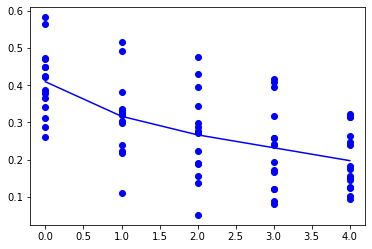

In [10]:
# Now combine!
oratioboth_comb = np.expand_dims(np.concatenate((oratioboth[:, :, 0], oratioboth[:, :, 1]), 0), 2)
figc, axc = er.plot_overlaps(oratioboth_comb, days=days)
axc.set_title(group_title + ' Combined Both normalized')

In [ ]:
## Plot scatterboxes for change from day -1 to 4hr and 4hr to day 1
from plot_functions import scatter_box
import scipy.stats as sstats

# Remove marble14/20 for now, fix once data points are recovered
if group_title is 'Control':
    oratio_good = oratioboth[[0, 1, 2, 3, 5], :, :]
    oratio_goodc = oratio_good
elif group_title is 'Anisomycin':
    oratio_good = oratioboth[[0, 1, 3], :, :]
    oratio_gooda = oratio_good

fig, ax = scatter_box([oratio_good[:, 0, :].reshape(-1) - oratio_good[:, 1, :].reshape(-1),
                       oratio_good[:, 1, :].reshape(-1) - oratio_good[:, 2, :].reshape(-1)],
                      xlabels=['Day -1 to 4hr', '4hr to Day 1'], ylabel=r'$\Delta\_overlap',
                      alpha=0.5)

ax.set_title(group_title)
fig.savefig(os.path.join(pathname, group_title + ' Change in Overlap after Injection.pdf'))

# Stats are a bit weird - even though it looks like ANI guys start out super steep and then level off,
# Control guys do a bit of the same, though to a lesser extent
t_doverlap, pt_doverlap = sstats.ttest_rel(oratio_good[:, 0, :].reshape(-1) - oratio_good[:, 1, :].reshape(-1),
                        oratio_good[:, 1, :].reshape(-1) - oratio_good[:, 2, :].reshape(-1))

## Get pvals for between group comparisons...
# First run top two cells with each group, then run this cell

t_do_bw1, p_do_bw1 = sstats.ttest_ind(oratio_goodc[:, 0, :].reshape(-1) - oratio_goodc[:, 1, :].reshape(-1),
                                      oratio_gooda[:, 0, :].reshape(-1) - oratio_gooda[:, 1, :].reshape(-1))

t_do_bw2, p_do_bw2 = sstats.ttest_ind(oratio_goodc[:, 1, :].reshape(-1) - oratio_goodc[:, 2, :].reshape(-1),
                                      oratio_gooda[:, 1, :].reshape(-1) - oratio_gooda[:, 2, :].reshape(-1))


## Plot Number of Neurons active for each session

import placefield_stability as pfs
import er_plot_functions as er
import os
import matplotlib.pyplot as plt
import cell_tracking as ct
import eraser_reference as err

group_title = 'Anisomycin'
if group_title is 'Control':
    mice = err.control_mice_good
elif group_title is 'Anisomycin':
    mice = err.ani_mice_good
days = [-2, -1, 4, 1, 2, 7]

arenas = ['Shock', 'Open']

# Get overlapping cell ratios for each day/arena using Shock day -2 as a reference
pathname = r'C:\Users\kinsky.AD\Dropbox\Imaging Project\Manuscripts\Eraser\Figures'  # Plotting folder
nneurons = ct.get_group_num_neurons(mice, days=days, arenas=arenas)

fig, ax = ct.plot_num_neurons(nneurons)
ax.set_title(group_title)
fig.savefig(os.path.join(pathname, group_title + ' - ' + 'NumNeurons.pdf'))

fig2, ax2 = ct.plot_num_neurons(nneurons, normalize='1')
ax2.set_title(group_title)
fig2.savefig(os.path.join(pathname, group_title + ' - ' + 'NumNeuronsNorm.pdf'))

# Combine and plot
nneurons_comb = np.expand_dims(np.concatenate((nneurons[:, 0, :], nneurons[:, 1, :])), 1)
figc, axc = ct.plot_num_neurons(nneurons_comb)
axc.set_title(group_title + ' Combined')
figc.savefig(os.path.join(pathname, group_title + ' Combined - ' + 'NumNeurons.pdf'))

## Get stats for difference between all the above!
import scipy.stats as stats
import cell_tracking as ct
import eraser_reference as err
import matplotlib.pyplot as plt
import os as os
pathname = r'C:\Users\kinsky.AD\Dropbox\Imaging Project\Manuscripts\Eraser\Figures'  # Plotting folder
days = [-2, -1, 4, 1, 2, 7]
day_labels = ['-2', '-1', '4hr', '1', '2', '7']
arenas = ['Shock', 'Open']
norm_day = -1  # use -1 until you fix Marble20 day -2 data, then use -2

norm_sesh_ind = [days.index(i) for i in days if norm_day == i][0]
nneurons_c = ct.get_group_num_neurons(err.control_mice_good, days=days, arenas=arenas)
nnormc = ct.norm_num_neurons(nneurons_c, norm_sesh_ind)
nneurons_a = ct.get_group_num_neurons(err.ani_mice_good, days=days, arenas=arenas)
nnorma = ct.norm_num_neurons(nneurons_a, norm_sesh_ind)

## Do ANOVA for number neurons changing across all days
nmice, narena, ndays = nneurons_a.shape


# Friedman test - probably not enough samples for this to be legit
# Omit day -2 (index 0) for now due to nans from Marble20
stata, pfra = stats.friedmanchisquare(nneurons_a[:, :, 1].reshape(-1), nneurons_a[:, :, 2].reshape(-1),
                            nneurons_a[:, :, 3].reshape(-1), nneurons_a[:, :, 4].reshape(-1),
                            nneurons_a[:, :, 5].reshape(-1))


statc, pfrc = stats.friedmanchisquare(nneurons_c[:, :, 0].reshape(-1), nneurons_c[:, :, 1].reshape(-1),
                            nneurons_c[:, :, 2].reshape(-1), nneurons_c[:, :, 3].reshape(-1),
                            nneurons_c[:, :, 4].reshape(-1), nneurons_c[:, :, 5].reshape(-1))

# ANOVA - really should be a repeated measures ANOVA
stata, panovaa = stats.f_oneway(nneurons_a[:, :, 1].reshape(-1), nneurons_a[:, :, 2].reshape(-1),
                            nneurons_a[:, :, 3].reshape(-1), nneurons_a[:, :, 4].reshape(-1),
                            nneurons_a[:, :, 5].reshape(-1))
stata_nrm, panovaa_nrm = stats.f_oneway(nnorma[:, :, 1].reshape(-1),
                            nnorma[:, :, 3].reshape(-1), nnorma[:, :, 4].reshape(-1),
                            nnorma[:, :, 5].reshape(-1))
# Omit Marble 14 day 2 due to missing data
statc, panovac = stats.f_oneway(nneurons_c[:, :, 0].reshape(-1), nneurons_c[:, :, 1].reshape(-1),
                                nneurons_c[:, :, 2].reshape(-1), nneurons_c[:, :, 3].reshape(-1),
                                nneurons_c[[0, 1, 2, 3, 5], :, 4].reshape(-1),
                                nneurons_c[:, :, 5].reshape(-1))
statc_nrm, panovac_nrm = stats.f_oneway(nnormc[:, :, 0].reshape(-1),
                                        nnormc[:, :, 2].reshape(-1), nnormc[:, :, 3].reshape(-1),
                                        nnormc[[0, 1, 2, 3, 5], :, 4].reshape(-1),
                                        nnormc[:, :, 5].reshape(-1))
## Do post-hoc comparisons
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Remove marble20 since he has NaNs for day -1
nnorma_no20 =nnorma[[0, 1, 3], :, :]
groupsa = np.tile(np.asarray([1, 2, 3, 4, 5]), [3, 2, 1])

pha = pairwise_tukeyhsd(nnorma_no20[:, :, [0, 2, 3, 4, 5]].reshape(-1),
                        groupsa.reshape(-1))
print(pha)

# Remove marble20 since he has NaNs for day -1
groupsc = np.tile(np.asarray([1, 2, 3, 4, 5]), [5, 2, 1])
nnormc_no14 = nnormc[[0, 1, 2, 3, 5], :, :]
phc = pairwise_tukeyhsd(nnormc_no14[:, :, [0, 2, 3, 4, 5]].reshape(-1),
                        groupsc.reshape(-1))
print(phc)

## Check between shock and neutral arena within groups
tc_win = np.ones(len(days))*np.nan
pc_win = np.ones(len(days))*np.nan
ta_win = np.ones(len(days))*np.nan
pa_win = np.ones(len(days))*np.nan
t_bw = np.ones(len(days))*np.nan
p_bw = np.ones(len(days))*np.nan
trks_bw = np.ones(len(days))*np.nan
prks_bw = np.ones(len(days))*np.nan

# Get within group stats for each day - no differences!
for idd, day in enumerate(days):
    tc_win[idd], pc_win[idd] = stats.ttest_ind(nneurons_c[:, 0, idd],
                                               nneurons_c[:, 1, idd], nan_policy='omit')
    ta_win[idd], pa_win[idd] = stats.ttest_ind(nneurons_a[:, 0, idd],
                                               nneurons_a[:, 1, idd], nan_policy='omit')

# Get between group differences!
for idd, day in enumerate(days):
    # Independent t-test
    t_bw[idd], p_bw[idd] = stats.ttest_ind(nnormc.reshape((-1, len(days)))[:, idd],
                                            nnorma.reshape((-1, len(days)))[:, idd],
                                           nan_policy='omit')

    # Ranksum test
    trks_bw[idd], prks_bw[idd] = stats.ranksums(nnormc.reshape((-1, len(days)))[:, idd],
                                           nnorma.reshape((-1, len(days)))[:, idd])
p_bw1sided = p_bw/2

## Now plot them on top of one another!
nmicec, _, ndays = nnormc.shape
nmicea, _, _ = nnorma.shape
fig, ax = plt.subplots()
jitter = 0.05
ax.plot(np.matlib.repmat(np.arange(0, ndays), nmicec*2, 1) - jitter,
        nnormc.reshape((-1, ndays)), 'bo')
linec, = ax.plot(np.arange(0, ndays) - jitter, np.nanmean(nnormc.reshape((-1, ndays)),
                                                 axis=0), 'b-')
ax.plot(np.matlib.repmat(np.arange(0, ndays), nmicea*2, 1) + jitter,
        nnorma.reshape((-1, ndays)), 'ro')
linea, = ax.plot(np.arange(0, ndays)+ jitter, np.nanmean(nnorma.reshape((-1, ndays)),
                                                 axis=0), 'r-')
plt.legend((linec, linea), ('Control', 'Anisomycin'))
ax.set_xlabel('Day')
ax.set_xticks(np.arange(0, ndays))
ax.set_xticklabels(day_labels)
ax.set_ylabel('Normalized # Neurons')

fig.savefig(os.path.join(pathname, 'Between Group Normalized Neuron Plot.pdf'))

Plots #1/2: # Cells recorded across days

Plot # 5: Normalized cell count across days with comparisons between ANI and Controls

Plot #6: Plot of off cells by quartile

Plot #6a (Supplemental 1): Example max projections showing washout in ANI recordings - include with more raw data from other animals.

Plot #7: Example place-fields across sessions

Plot #7a (Supplemental 2): Example place fields from Learner, Non-Learner, and ANI. Plot by quartile - two from each maybe?

Plots #8: Placefield stability and reorganization across days - ANI reduces shock-induced PF remapping and also stifles extinction-related remapping.  